You can find more information and examples on Quantum State Tomography in the following tutorials:

https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorials/blob/master/qiskit/ignis/state-tomography.ipynb


https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorials/blob/master/community/ignis/tomography-overview.ipynb

In [13]:
import qiskit.ignis.verification.tomography
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

In [14]:
IBMQ.load_accounts()

C:\Users\TOMASZSTOPA\Anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [43]:
qr = QuantumRegister(5)
#cr = ClassicalRegister(2) --> We do not provide classical register!
circuit = QuantumCircuit(qr)
circuit.h(qr[2])
circuit.cx(qr[2], qr[0])
#Do not measure the state of the qubits 
#as the tomography will show measured (collapsed) state density matrix! 
#circuit.measure(qr[0], cr[0])
#circuit.measure(qr[2], cr[1])

In [44]:
from qiskit.ignis.verification.tomography import state_tomography_circuits
qst_circuits = state_tomography_circuits(circuit, [qr[0],qr[2]])

In [45]:
len(qst_circuits)

9

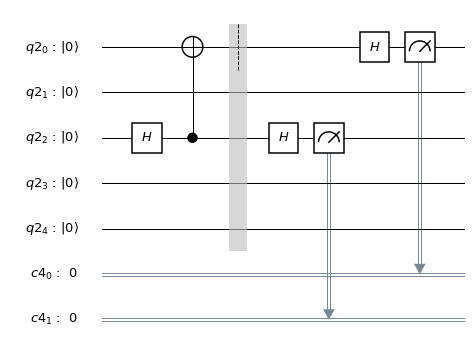

In [93]:
%matplotlib inline
qst_circuits[0].draw(output='mpl')

In [47]:
backend = IBMQ.get_backend('ibmqx4')

In [48]:
job = execute(qst_circuits, backend=backend, shots=1024)

In [50]:
job.job_id()

'5cd9976a550cb1007b21ff1d'

In [51]:
job_monitor(job, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is queued </p>")

In [52]:
from qiskit.ignis.verification.tomography import StateTomographyFitter
statefit = StateTomographyFitter(job.result(), qst_circuits)

In [53]:
statefit.data

{('X', 'X'): {'11': 415, '10': 56, '00': 516, '01': 37},
 ('X', 'Y'): {'11': 198, '10': 295, '00': 260, '01': 271},
 ('X', 'Z'): {'11': 205, '10': 238, '00': 341, '01': 240},
 ('Y', 'X'): {'11': 208, '10': 262, '00': 255, '01': 299},
 ('Y', 'Y'): {'11': 26, '10': 470, '00': 106, '01': 422},
 ('Y', 'Z'): {'11': 221, '10': 259, '00': 300, '01': 244},
 ('Z', 'X'): {'11': 220, '10': 275, '00': 278, '01': 251},
 ('Z', 'Y'): {'11': 212, '10': 250, '00': 328, '01': 234},
 ('Z', 'Z'): {'11': 453, '10': 56, '00': 477, '01': 38}}

In [54]:
rho = statefit.fit()

In [65]:
import numpy as np
np.around(rho,3)

array([[0.495+0.j   , 0.041-0.024j, 0.01 -0.028j, 0.392+0.049j],
       [0.041+0.024j, 0.039+0.j   , 0.017+0.003j, 0.023-0.003j],
       [0.01 +0.028j, 0.017-0.003j, 0.052+0.j   , 0.012-0.015j],
       [0.392-0.049j, 0.023+0.003j, 0.012+0.015j, 0.414+0.j   ]])

In [69]:
from qiskit import Aer
qr_small = QuantumRegister(2)
circuit_small = QuantumCircuit(qr_small)
circuit_small.h(qr_small[1])
circuit_small.cx(qr_small[1], qr_small[0])
print(circuit_small)

job_simulator = qiskit.execute(circuit_small, 
                               Aer.get_backend('statevector_simulator'))
psi_ideal = job_simulator.result().get_statevector(circuit_small)
print(psi_ideal)

              ┌───┐
q4_0: |0>─────┤ X ├
         ┌───┐└─┬─┘
q4_1: |0>┤ H ├──■──
         └───┘     
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [70]:
from qiskit.quantum_info import state_fidelity
state_fidelity = state_fidelity(psi_ideal, rho)
print('Fit fidelity =', state_fidelity)

Fit fidelity = 0.8463238682685761


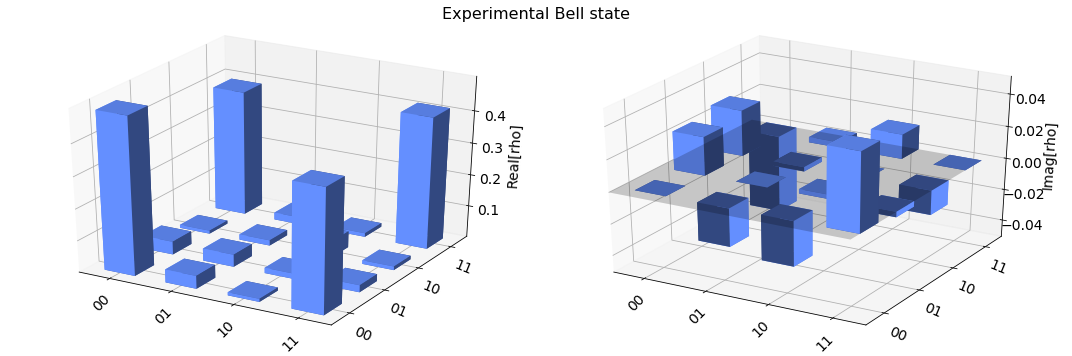

In [75]:
from qiskit.tools.visualization import plot_state_city
plot_state_city(rho, title="Experimental Bell state")

In [80]:
from qiskit.tools.visualization import iplot_state_city
iplot_state_city(rho)

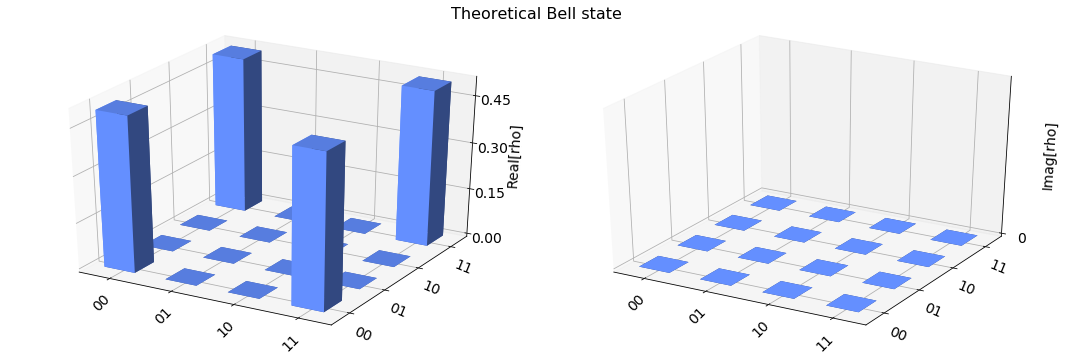

In [76]:
plot_state_city(psi_ideal, title="Theoretical Bell state")

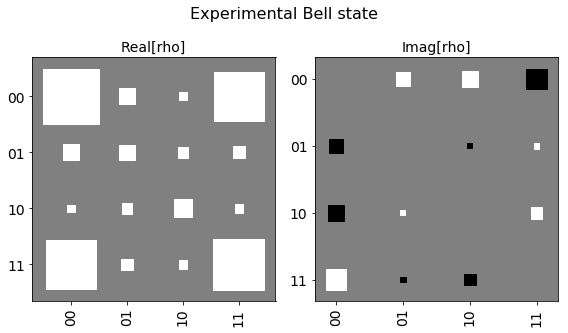

In [95]:
from qiskit.tools.visualization import plot_state_hinton
plot_state_hinton(rho, title="Experimental Bell state")


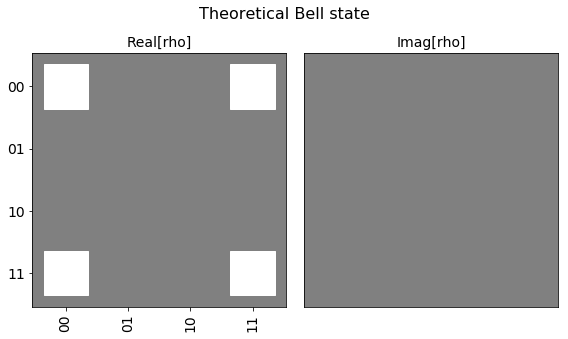

In [96]:
plot_state_hinton(psi_ideal, title="Theoretical Bell state")